## Hello World Agent
End Graph:
$$START -> NODE -> END$$

This graph definition is the simplest define that can be done in LangGraph. This graph is NOT an agent, it is simply a workflow.

In [3]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph

In [4]:
""" The goal of this agent is to be a personalized greeter (ex: Hello {name}, you are doing a great job!)

STEPS:
1. define an agent state class
2. define tool function (this will be the node)
3. create a LangGraph structure
"""

' The goal of this agent is to be a personalized greeter (ex: Hello {name}, you are doing a great job!)\n\nSTEPS:\n1. define an agent state class\n2. define tool function (this will be the node)\n3. create a LangGraph structure\n'

In [ ]:
# STEP 1: define agent state class which evokes TypeDict, and define the keys
# the AgentState is the memory that keeps the context of the application
class AgentState(TypedDict):
    message: str

# STEP 2: define a tool function/method that will be responsible for greeting
# because this is what the AgentState uses, it needs to take in the State, and output the new updated State
# the tool will also need a DocString, which defines to the Agent when and where to use the function
def personalized_greeter(state: AgentState) -> AgentState:
    """
    Simple node that adds a greeting message to the state.
    """
    # we are calling state (a Dictionary) and we want to change the message key
    state["message"] = f"Hello {state['message']}, you are doing a great job!"

    # return the new updated state
    return state

In [ ]:
# STEP 3: define and build the graph structure
workflow = StateGraph(AgentState)  # the graph takes the State memory dict structure

# define the nodes and edges
workflow.add_node("Greeter", personalized_greeter)
workflow.set_entry_point("Greeter")  # this is the same as calling add_edge(START, key)
workflow.set_finish_point("Greeter")

application = workflow.compile()

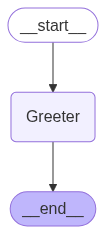

In [7]:
# extra step, but this visualizes the graph we created in LangGraph
from IPython.display import Image, display
display(Image(application.get_graph().draw_mermaid_png()))

In [11]:
# run the application
input_val = {"message": "Bob"}  # needs to be in dictionary form
result = application.invoke(input_val)
result["message"]

'Hello Bob, you are doing a great job!'